<a href="https://colab.research.google.com/github/toche7/DSEssentials/blob/Solution/Lab3_MultipleLinearRegression_STD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Multiple Linear Regression

Version 001

```
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
```



| Method | Description |
| ------------|------------ |
| fit(X, y ) | Fit linear model. |
| predict(X) | Predict using the linear model. |
| score(X, y) | Return the coefficient of determination of the prediction.|




การสร้าง   Multiple Linear Regression จะใช้ library ในการสร้างโมเดลแบบเดียวกับการสร้าง simple linear regression model  
แบบ Hypothesis Model ของ Multiple Linear Regression สามารถแสดงได้ดังนี้

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +...+\theta_nx_n \tag{1}
$$

![test](https://raw.githubusercontent.com/toche7/Picture/main/mlgmodel.png)


## 1. Example MLR with Real Estate Data Set.



### 1.1 Exploratory  Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

โหลดข้อมูลจากไฟล์ RealEstate.csv

In [ ]:
#!wget https://raw.githubusercontent.com/toche7/DataSets/main/RealEstate.csv

In [ ]:
df = pd.read_csv('https://github.com/toche7/DataSets/raw/main/RealEstate.csv')

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

ตรวจสอบข้อมูลด้วยคำสั่ง info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.columns = ['No', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']

In [ ]:
df.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


เปลี่ยนชื่อ column ไปเป็น

['no','x1','x2','x3','x4','x5','x6','y']

ให้ทำงานง่ายขี้น

In [ ]:
df[['X1','X2','X3','X4','X5']]

,X1,X2,X3,X4,X5
0,2012.917,32.0,84.87882,10,24.98298
1,2012.917,19.5,306.59470,9,24.98034
2,2013.583,13.3,561.98450,5,24.98746
3,2013.500,13.3,561.98450,5,24.98746
4,2012.833,5.0,390.56840,5,24.97937
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155
410,2012.667,5.6,90.45606,9,24.97433
411,2013.250,18.8,390.96960,7,24.97923
412,2013.000,8.1,104.81010,5,24.96674


from matplotlib import pyplot as plt
_df_8['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['X2'].plot(kind='hist', bins=20, title='X2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['X3'].plot(kind='hist', bins=20, title='X3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['X4'].plot(kind='hist', bins=20, title='X4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='X1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='X2', y='X3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='X3', y='X4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='X4', y='X5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['X3'].plot(kind='line', figsize=(8, 4), title='X3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['X4'].plot(kind='line', figsize=(8, 4), title='X4')
plt.gca().spines[['top', 'right']].set_visible(False)

ตรวจสอบค่า Correlation ของข้อมูล

In [ ]:
df.corr()

,No,X1,X2,X3,X4,X5,X6,Y
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


แสดงค่า correlation ด้วย heatmap

<Axes: >

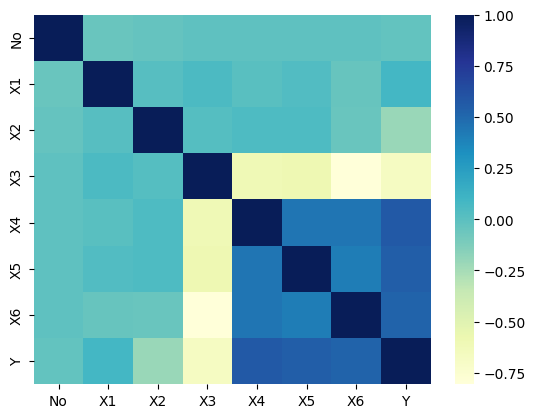

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="YlGnBu")

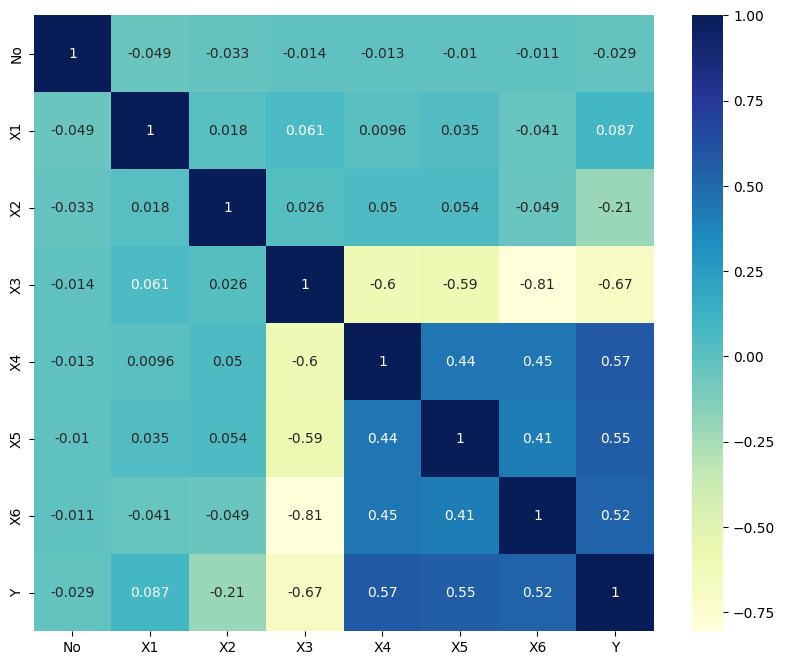

In [ ]:
# prompt: plot heat map of correlation of df

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()


แสดงภาพความสัมพันธ์แบบ scatter martix

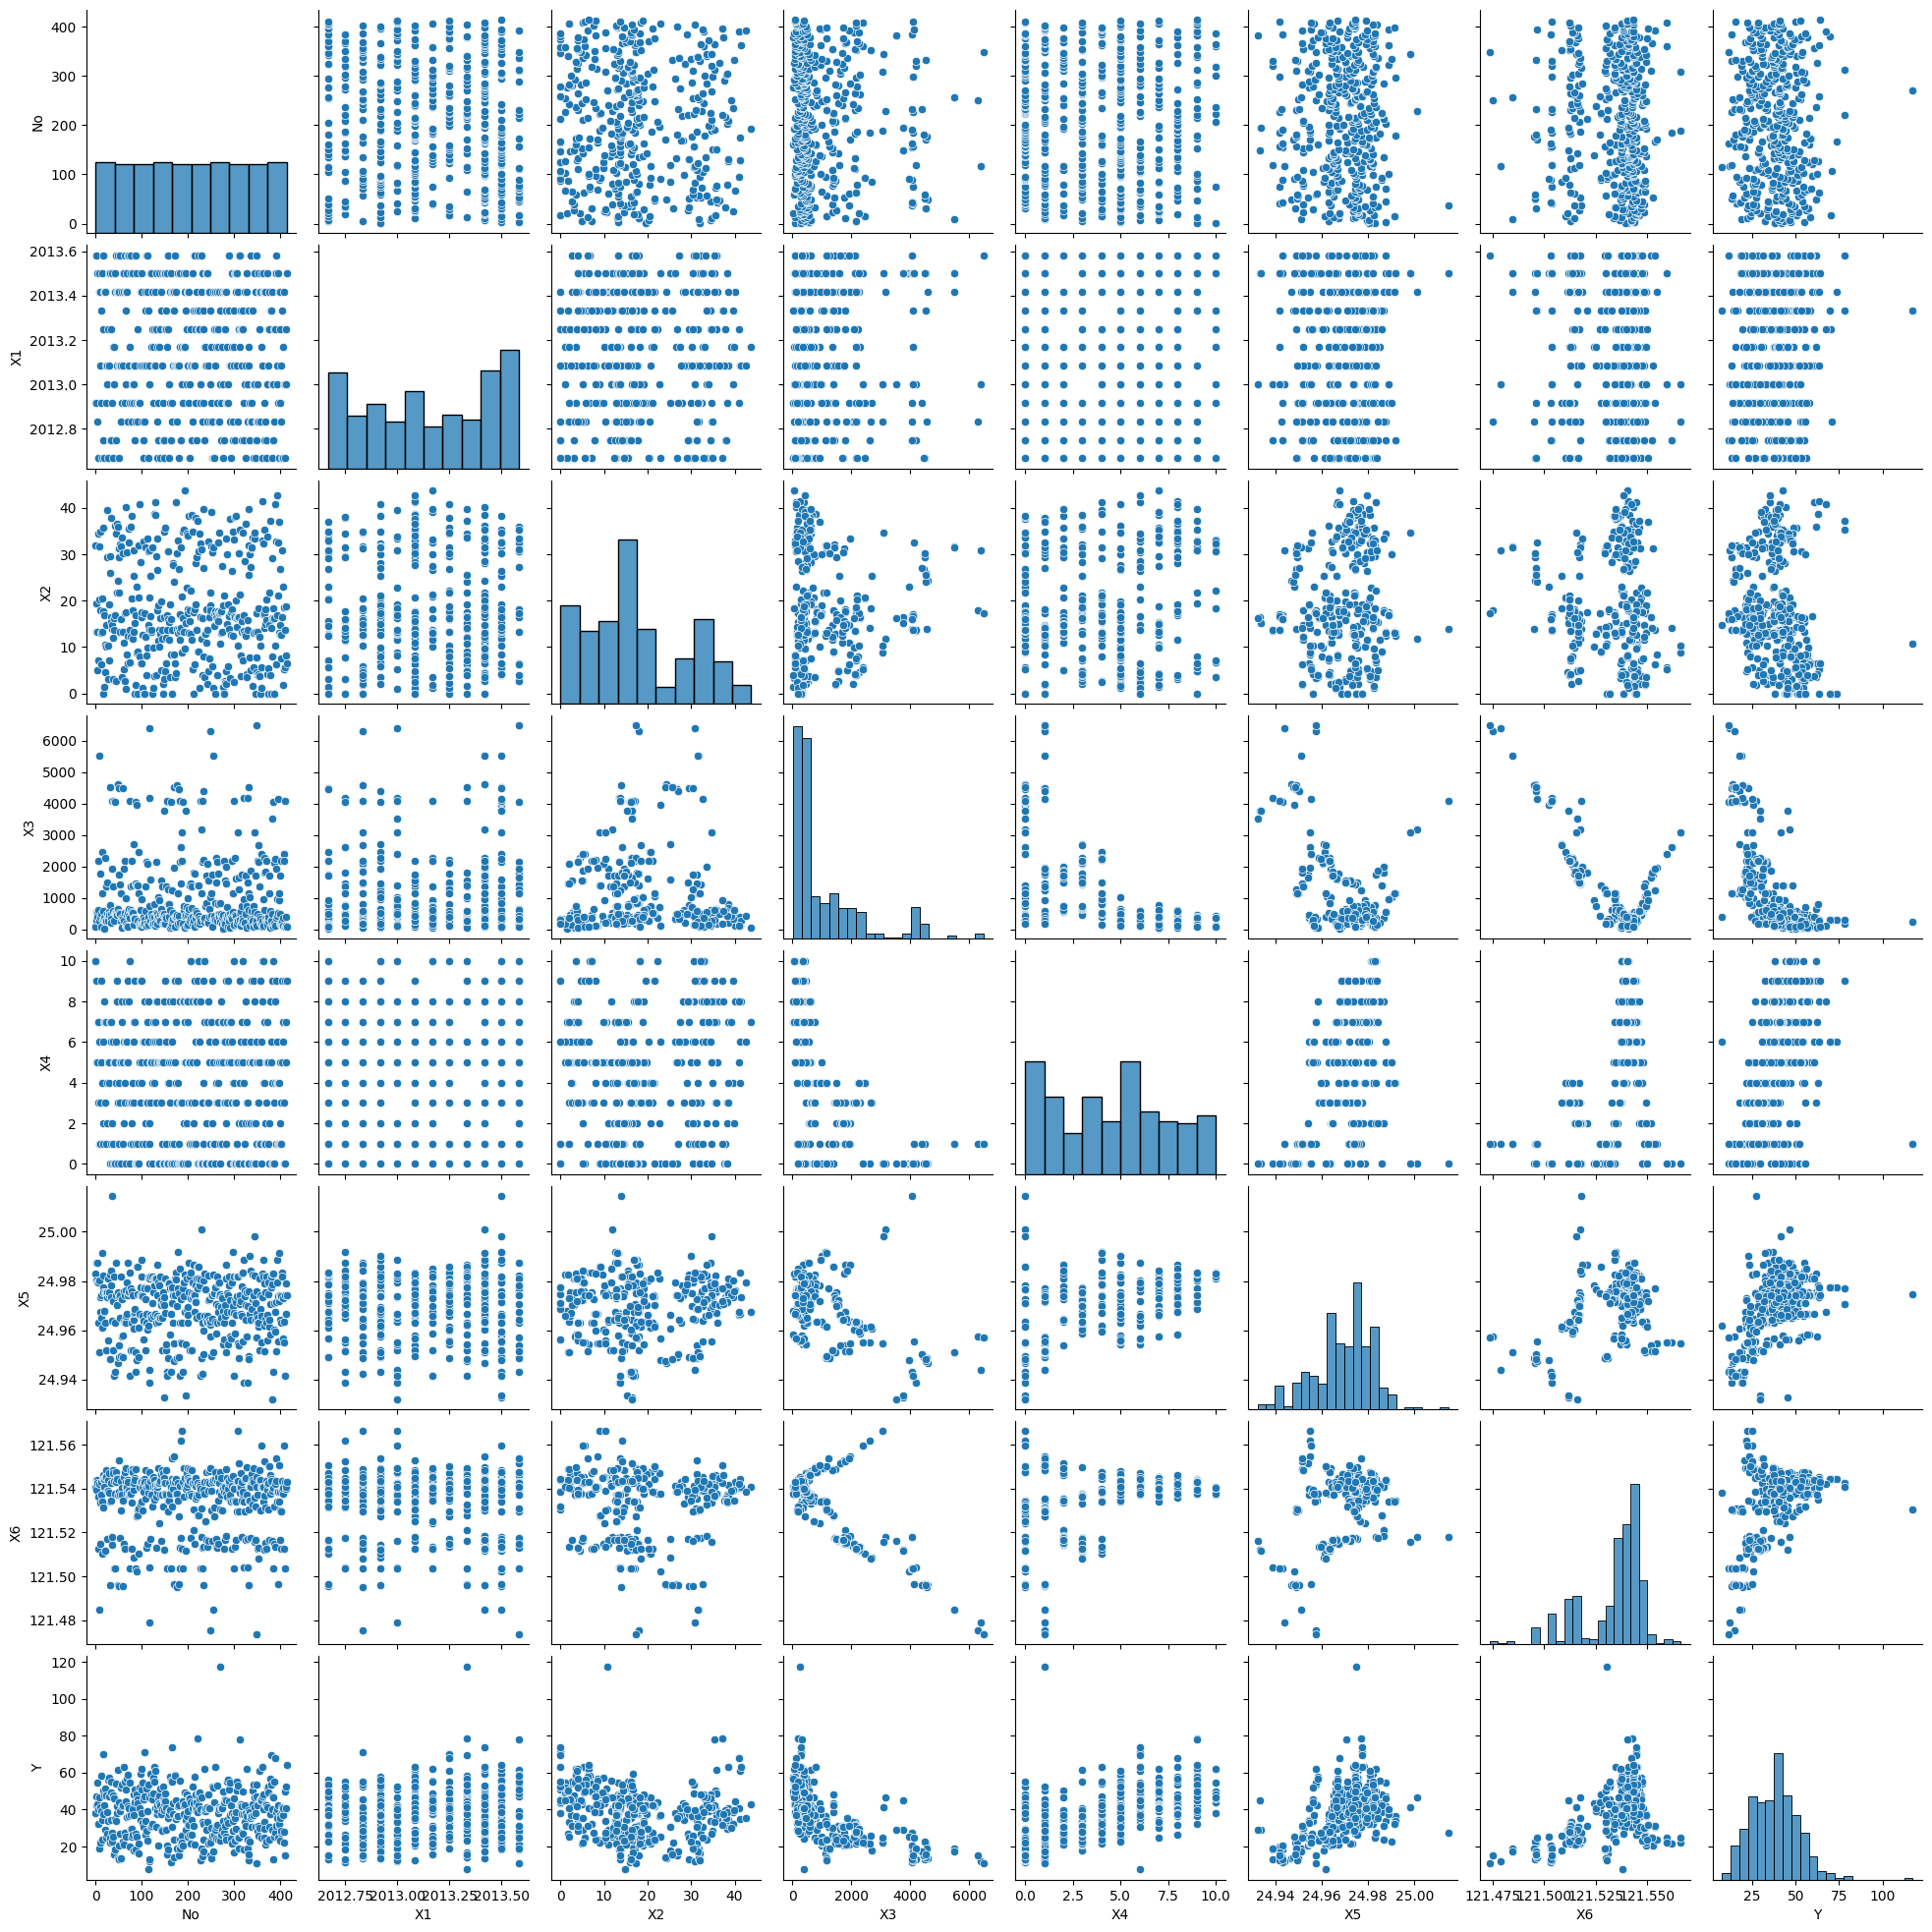

In [ ]:
sns.pairplot(df)

In [ ]:
X = df[['X1','X2','X3','X4', 'X5','X6']]

In [ ]:
y = df[['Y']]

### 1.2  Create Model Object and Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mLR = LinearRegression()

In [ ]:
mLR.fit(X,y)

LinearRegression()

In [ ]:
mLR.score(X,y)

0.5823704472723009

### 1.3 Predition and Evaluation

Predict value of $\hat{y}$

In [ ]:
X.shape

(414, 6)

In [ ]:
yPredict = mLR.predict(X)
yPredict.shape

(414, 1)

In [ ]:
X.head()

,X1,X2,X3,X4,X5,X6
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [ ]:
X[0:3]

,X1,X2,X3,X4,X5,X6
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391


In [ ]:
mLR.predict(X[0:3])

array([[47.1689389 ],
       [47.82573429],
       [48.79677789]])

In [ ]:
Xtest = [[1000, 32, 80, 10, 24,120]]

In [ ]:
mLR.predict(Xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-5368.01054875]])

In [ ]:
Xtest2 = [[1000, 32, 80, 10, 24,120],[2000, 32, 80, 10, 24,120]]

In [ ]:
mLR.predict(Xtest2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-5368.01054875],
       [ -221.78308577]])

Calculate the determination coefficient, $R^2$

In [ ]:
mLR.score(X,y)

0.5823704472723009

Calculate the mean sequare error

In [ ]:
# from sklearn.metrics import mean_squared_error
# prediction
# mse1 = mean_squared_error(y, predict)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
yPredict = mLR.predict(X)


In [ ]:
mean_squared_error(y, yPredict)

77.13171720187344

### 1.4 Select Feature for Model Development

In [ ]:
X.head()

,X1,X2,X3,X4,X5,X6
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


###  1.5 Data Standardization and Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsc = sc.fit_transform(X)


In [ ]:
X

,X1,X2,X3,X4,X5,X6
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
Xsc

array([[-0.82368321,  1.25562833, -0.79249504,  2.00740743,  1.12542986,
         0.44876222],
       [-0.82368321,  0.15708622, -0.61661163,  1.66750286,  0.91244418,
         0.40113894],
       [ 1.54115111, -0.38779067, -0.41401527,  0.30788458,  1.48686011,
         0.68818339],
       ...,
       [ 0.35873395,  0.09556786, -0.54967846,  0.98769372,  0.82289338,
         0.42397202],
       [-0.52896662, -0.84478419, -0.77668389,  0.30788458, -0.18475479,
         0.4768143 ],
       [ 1.24643452, -0.98539758, -0.78807071,  1.66750286,  0.42757905,
         0.63534112]])

In [ ]:
mLR.fit(Xsc,y)

LinearRegression()

In [ ]:
mLR.score(Xsc,y)

0.582370447272307

### Model ของ Multiple Linear Regression

In [ ]:
mLR.intercept_

array([37.98019324])

In [ ]:
mLR.coef_

array([[ 1.449314  , -3.06878822, -5.65682337,  3.33410316,  2.79478248,
        -0.19043687]])

In [ ]:
X

,X1,X2,X3,X4,X5,X6
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067
